In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf

In [2]:
df = pd.read_csv('data/ToyotaCorolla.csv', encoding='windows-1252')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df.shape

(1436, 38)

# Feature Extraction

In [4]:
cols = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df = df.loc[:,cols]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df.shape

(1436, 9)

In [6]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
df.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


# Data Visualisation

## Correlation plot

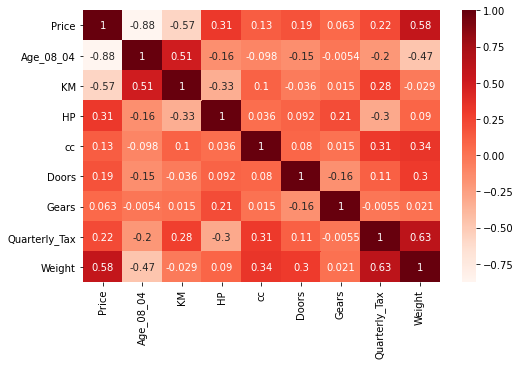

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot = True, cmap = 'Reds')

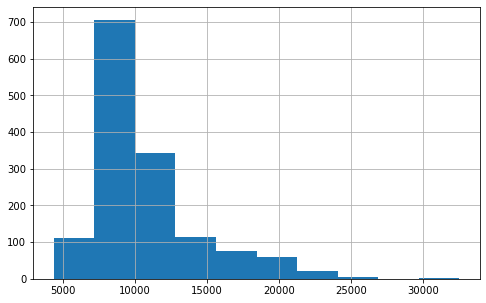

In [10]:
# Distribution of Price
df['Price'].hist(figsize = (8,5))

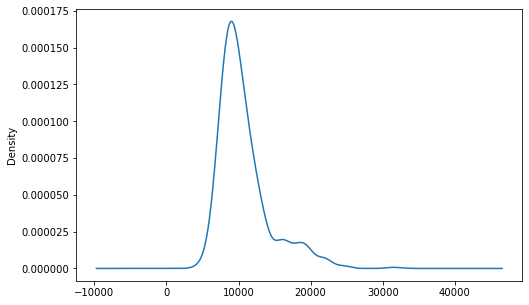

In [11]:
df['Price'].plot(kind= 'kde', figsize = (8,5))

Text(0.5, 1.0, "Price of car wrt to it's age")

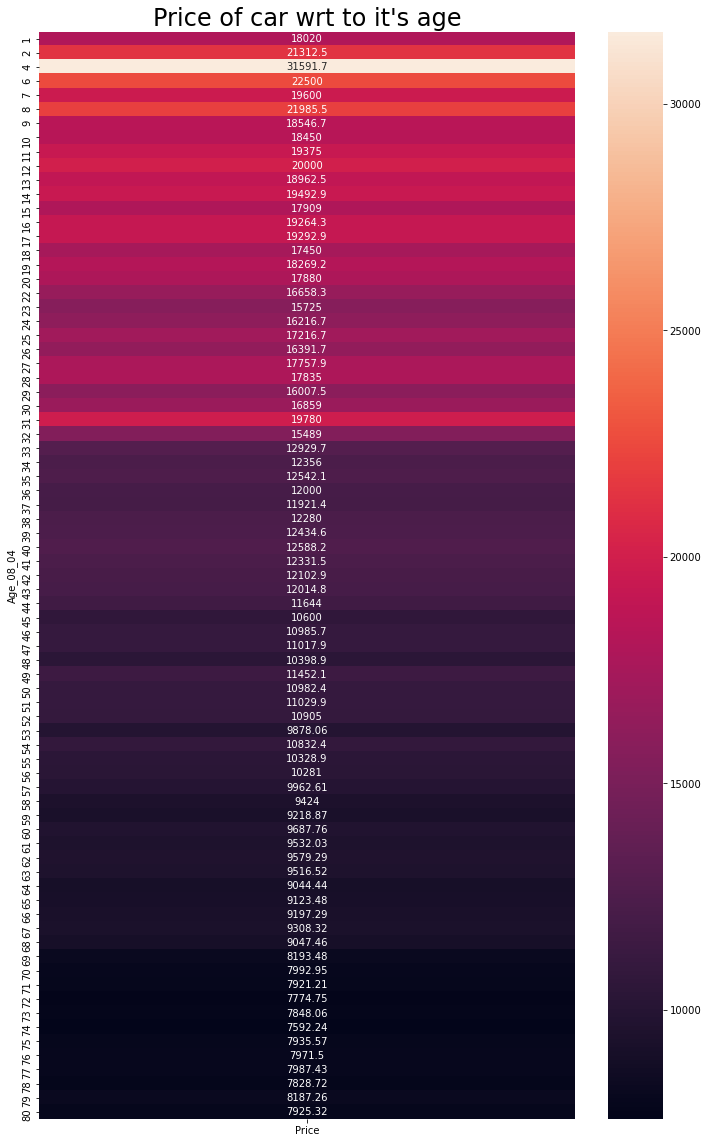

In [12]:
# Price vs Age
plt.figure(figsize=(12, 20))
heatmap_y_month = pd.pivot_table(data=df,values="Price",index="Age_08_04",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.title("Price of car wrt to it's age", fontsize = 24)

In [13]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

Text(0, 0.5, 'Average Price')

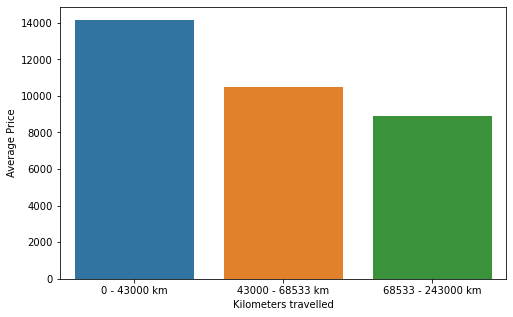

In [14]:
a = pd.cut(df.KM , bins = [0,df['KM'].quantile(0.25), df['KM'].mean(), df['KM'].max()], labels = ['0 - 43000 km','43000 - 68533 km','68533 - 243000 km'])
df2 = df.copy()
df2['Kilometers'] = a
b = df2.groupby('Kilometers').mean()

plt.figure(figsize = (8,5))
sns.barplot(y = b['Price'] , x = b.index)
plt.xlabel('Kilometers travelled')
plt.ylabel('Average Price')

In [15]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of Age')

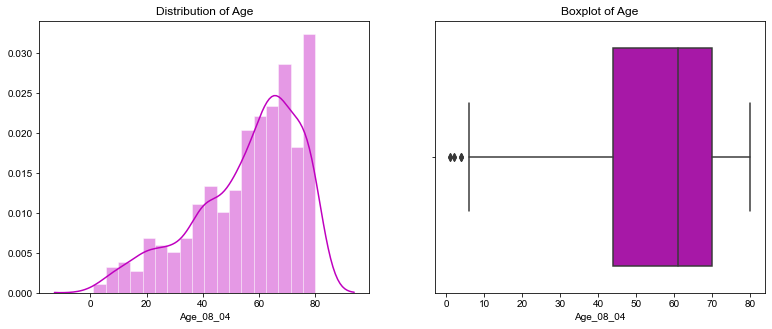

In [16]:
_ , (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('darkgrid')
sns.distplot(df['Age_08_04'], ax = ax1 , color = 'm')
sns.boxplot(df['Age_08_04'], ax = ax2 , color = 'm')
ax1.set_title('Distribution of Age')
ax2.set_title('Boxplot of Age')

Text(0.5, 1.0, 'Boxplot of KM')

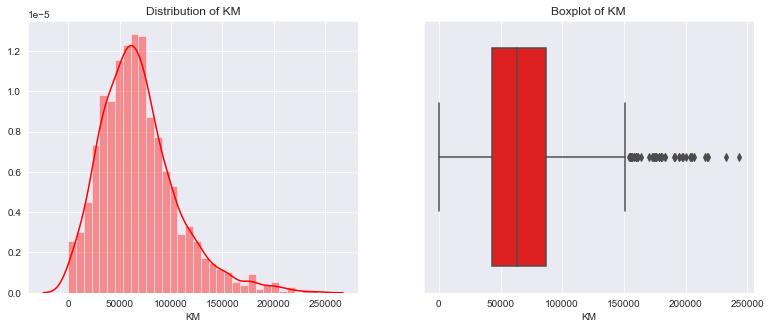

In [17]:
_ , (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('darkgrid')
sns.distplot(df['KM'], ax = ax1 , color = 'r')
sns.boxplot(df['KM'], ax = ax2 , color = 'r')
ax1.set_title('Distribution of KM')
ax2.set_title('Boxplot of KM')

Text(0.5, 1.0, 'Boxplot of HP')

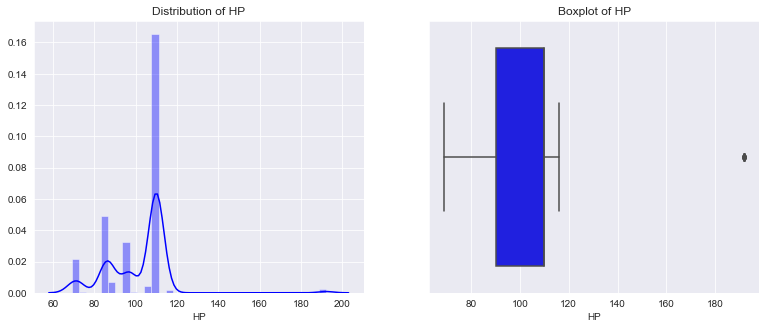

In [18]:
_ , (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('darkgrid')
sns.distplot(df['HP'], ax = ax1 , color = 'b')
sns.boxplot(df['HP'], ax = ax2 , color = 'b')
ax1.set_title('Distribution of HP')
ax2.set_title('Boxplot of HP')

Text(0.5, 1.0, 'Boxplot of cc')

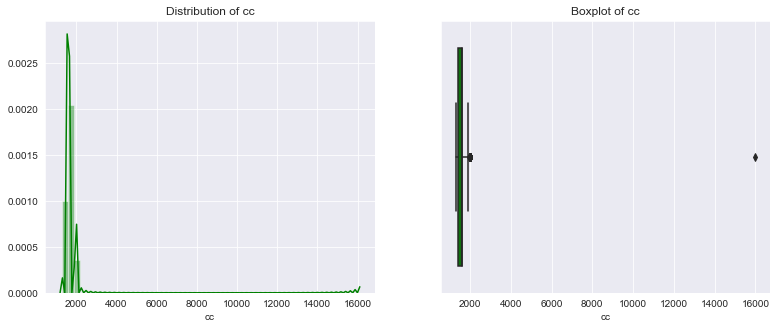

In [19]:
_ , (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('darkgrid')
sns.distplot(df['cc'], ax = ax1 , color = 'g')
sns.boxplot(df['cc'], ax = ax2 , color = 'g')
ax1.set_title('Distribution of cc')
ax2.set_title('Boxplot of cc')

Text(0.5, 1.0, 'Boxplot of Doors')

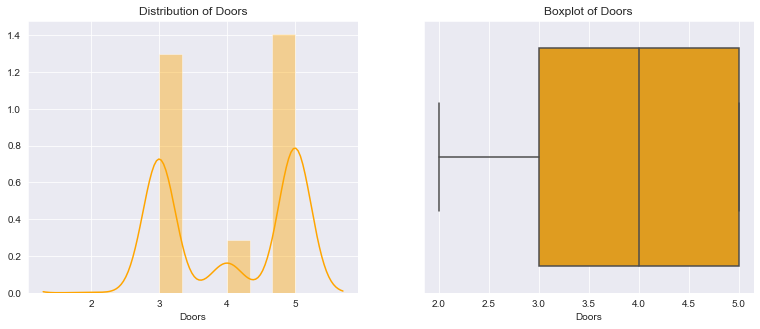

In [20]:
_ , (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('darkgrid')
sns.distplot(df['Doors'], ax = ax1 , color = 'orange')
sns.boxplot(df['Doors'], ax = ax2 , color = 'orange')
ax1.set_title('Distribution of Doors')
ax2.set_title('Boxplot of Doors')

#### It can be observed that cc and HP have outliers

Text(0, 0.5, 'Average Price')

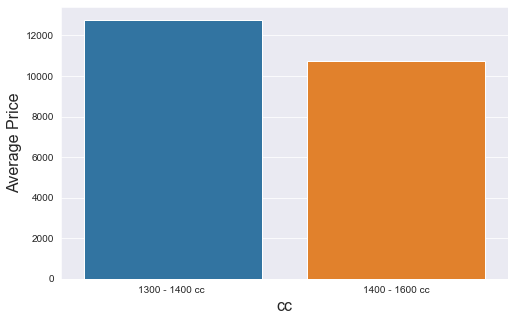

In [21]:
a = pd.cut(df.cc, bins = [df.cc.min(),df.cc.mean(),df.cc.quantile(0.75)], labels = ['1300 - 1400 cc ', '1400 - 1600 cc'])
df2['cc type'] = a
b = df2.groupby('cc type').mean()

plt.figure(figsize = (8,5))
sns.barplot(y = b['Price'] , x = b.index)
plt.xlabel('cc', fontsize = 16)
plt.ylabel('Average Price', fontsize = 16)

# Data-Preprocessing

## Treating outliers

In [22]:
def remove_outliers(data):
    avg = data.mean()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    for i in range(data.shape[0]):
        if data.loc[i] > (q3 + 1.5*iqr):
            data.loc[i] = avg
    return data

In [23]:
df['cc'] = remove_outliers(df.loc[:,'cc'])

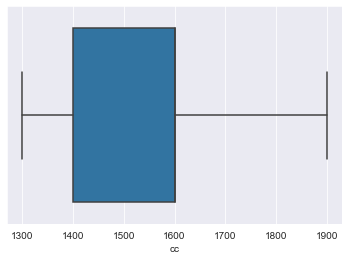

In [24]:
sns.boxplot(df['cc'])

In [25]:
df['HP'] = remove_outliers(df.loc[:,'HP'])

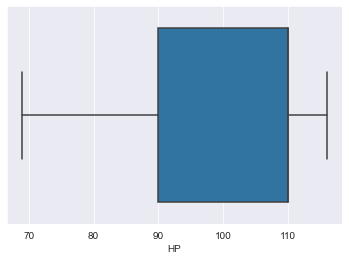

In [26]:
sns.boxplot(df['HP'])

## Data Splitting

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

In [34]:
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size=0.20 , random_state=42)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((1148, 8), (288, 8), (1148,), (288,))

## Data Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

# Modelling

In [38]:
model = smf.OLS(y_train, X_train).fit()

In [39]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.863    
Dependent Variable:     y                AIC:                         985.9075 
Date:                   2021-09-29 00:25 BIC:                         1026.2738
No. Observations:       1148             Log-Likelihood:              -484.95  
Df Model:               8                F-statistic:                 903.1    
Df Residuals:           1140             Prob (F-statistic):          0.00     
R-squared (uncentered): 0.864            Scale:                       0.13724  
------------------------------------------------------------------------------------
            Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1         -0.6215        0.0151      -41.0669      0.0000      -0.6512      -0.5918
x2         -0.2013        0.0152      -13.2704      0.0000      -0.2311      -0.1715
x3          0.1272        0.0157        8.1078      0.0000       0.0964       0.1580
x4         -0.0939        0.0153       -6.1304      0.0000      -0.1240      -0.0639
x5         -0.0022        0.0118       -0.1853      0.8531      -0.0253       0.0209
x6          0.0516        0.0112        4.5942      0.0000       0.0295       0.0736
x7          0.0201        0.0171        1.1796      0.2384      -0.0134       0.0536
x8          0.3183        0.0174       18.3183      0.0000       0.2842       0.3524
-------------------------------------------------------------------------------
Omnibus:                 153.322           Durbin-Watson:              2.033   
Prob(Omnibus):           0.000             Jarque-Bera (JB):           1574.041
Skew:                    -0.167            Prob(JB):                   0.000   
Kurtosis:                8.727             Condition No.:              3       
===============================================================================

"""

In [40]:
model.rsquared_adj , model.aic

(0.8627590084875868, 985.9075393559519)

In [41]:
y_pred = model.predict(X_test)

## Experimental analysis

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mse = mean_squared_error(y_pred,y_test)
rmse = np.round(np.sqrt(mse),4)
rmse

0.4052

In [44]:
y_pred = scalery.inverse_transform(y_pred)

In [48]:
X_test = scalerX.inverse_transform(X_test)
y_test = scalery.inverse_transform(y_test)

In [50]:
final_df = pd.DataFrame(X_test, columns = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight'])
final_df['Actual Price'] = y_test
final_df['Predicted Price'] = y_pred
final_df.head(10)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Actual Price,Predicted Price
0,50.0,22500.0,97.0,1400.00000,3.0,5.0,69.0,1025.0,10800.0,11411.710183
1,68.0,80426.0,110.0,1600.00000,3.0,5.0,85.0,1055.0,9950.0,8801.759995
2,59.0,130000.0,72.0,1576.85585,4.0,5.0,185.0,1135.0,7500.0,9585.846735
3,71.0,76000.0,110.0,1600.00000,5.0,5.0,85.0,1070.0,9250.0,8850.802517
4,65.0,59000.0,110.0,1600.00000,5.0,5.0,19.0,1075.0,9750.0,9896.721174
5,80.0,94079.0,110.0,1600.00000,5.0,5.0,85.0,1085.0,9950.0,7762.266726
6,67.0,79858.0,110.0,1600.00000,4.0,5.0,69.0,1040.0,9895.0,8556.829430
7,76.0,57263.0,110.0,1600.00000,3.0,5.0,69.0,1050.0,6750.0,8149.623752
8,33.0,51945.0,110.0,1600.00000,5.0,5.0,85.0,1075.0,13450.0,13983.338821
9,44.0,37389.0,110.0,1600.00000,5.0,5.0,85.0,1080.0,12950.0,13059.552178


#### Final Price Predicted with rmse of 0.4052. The results are very much accurate